# Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix , classification_report


from collections import Counter
from keras.utils.np_utils import to_categorical

# Import Data

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
y = data['label']
X = data.drop(columns = ['label'] , axis = 1)

In [4]:
counter = Counter(y)
print(counter)

Counter({4: 6705, 6: 1113, 2: 1099, 1: 514, 0: 327, 5: 142, 3: 115})


# Exploratory Data Analysis (EDA)

In [5]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

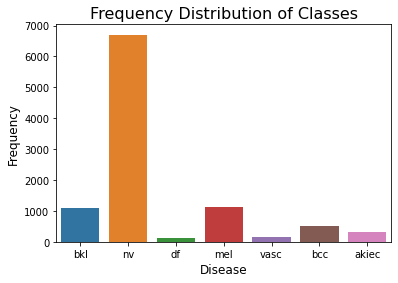

In [7]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

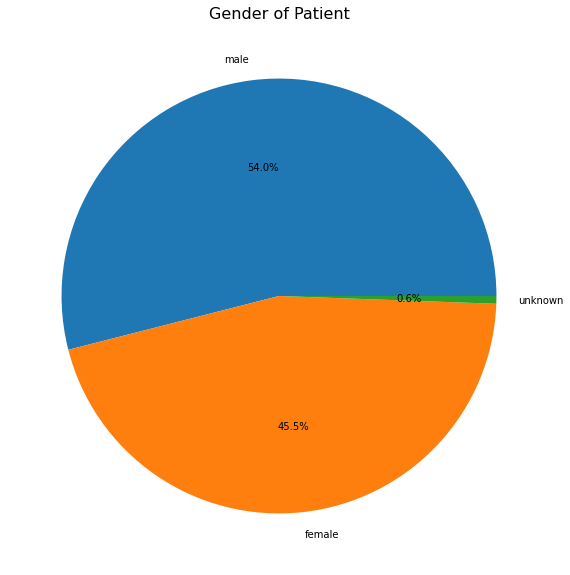

In [8]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

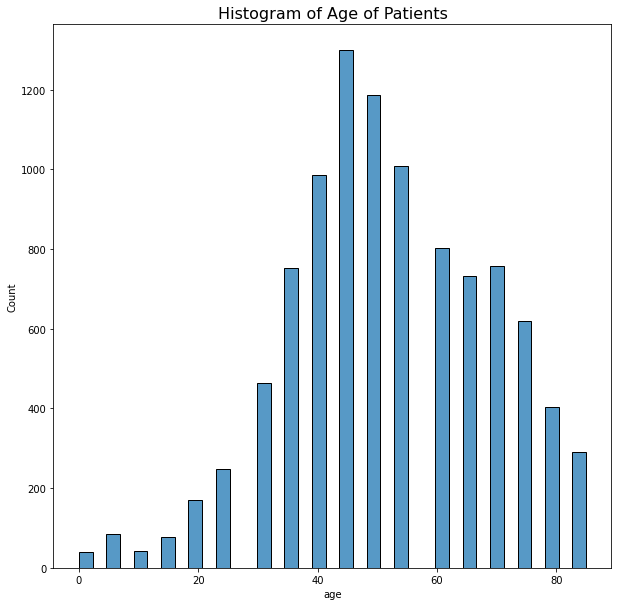

In [9]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'neck'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

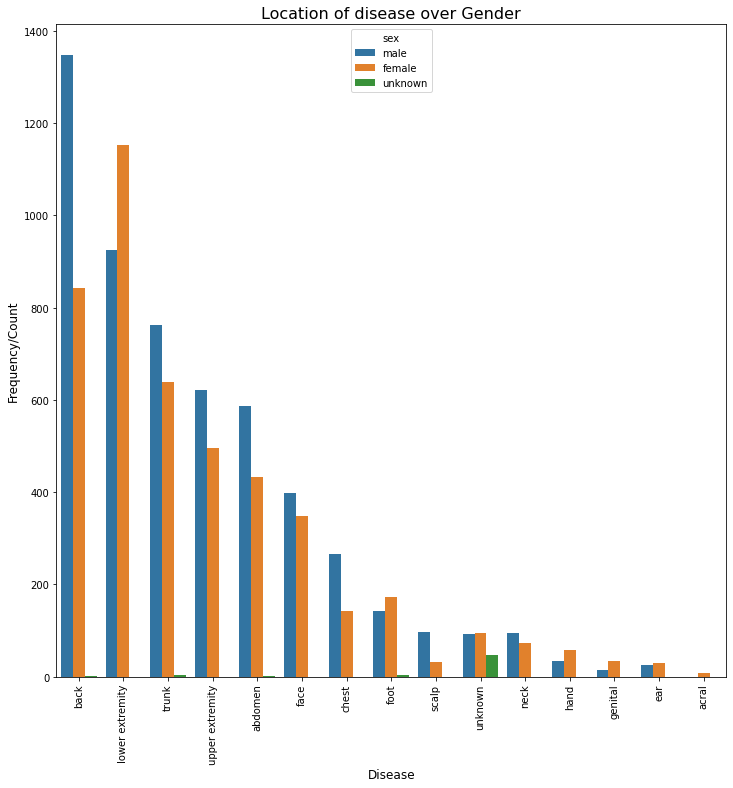

In [10]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

**Smote**

In [11]:
oversample = SMOTE()
X,y  = oversample.fit_resample(X,y)

In [12]:
counter = Counter(y)
print(counter)

Counter({2: 6705, 4: 6705, 3: 6705, 6: 6705, 5: 6705, 1: 6705, 0: 6705})


In [13]:
X.shape

(46935, 2352)

In [14]:
X = np.array(X).reshape(-1,28,28,3)
print('Shape of X :',X.shape)

Shape of X : (46935, 28, 28, 3)


In [19]:
def getcode(n) : 
    for x , y in classes.items() : 
        if n == x : 
            return y

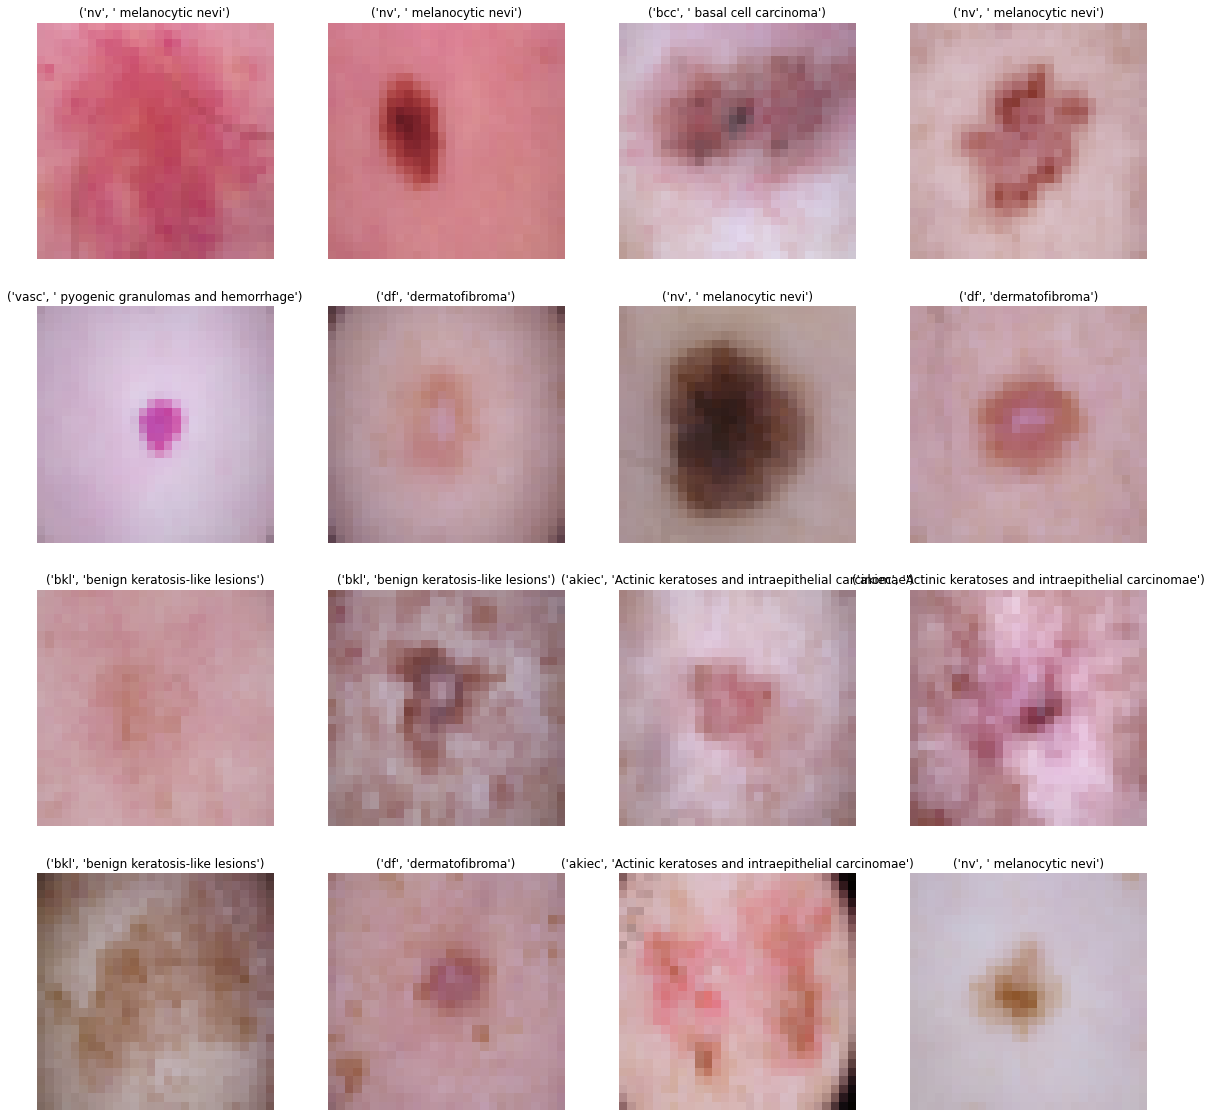

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),16))) : 
    plt.subplot(4,4,n+1)
    #image = cv2.imread(X[i])
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(getcode(y[i]))


In [21]:
print('Shape of y' , y.shape)
print("First Value of y" , y[0])

Shape of y (46935,)
First Value of y 2


In [22]:
y=to_categorical(y)

In [23]:
print('Shape of y' , y.shape)
print("First Value of y" , y[0])

Shape of y (46935, 7)
First Value of y [0. 0. 1. 0. 0. 0. 0.]


# Standardization and Splitting Data

In [24]:
# Stander Scaler
X = (X-np.mean(X))/np.std(X)

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Model Training

In [25]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [26]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [27]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 10,
                    callbacks=[callback , es])

Epoch 1/10
235/235 [==============================] - 3s 7ms/step - loss: 1.4364 - accuracy: 0.4353 - val_loss: 0.7338 - val_accuracy: 0.7318

Epoch 00001: saving model to best_model.h5
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6999 - accuracy: 0.7509 - val_loss: 0.5153 - val_accuracy: 0.8113

Epoch 00002: saving model to best_model.h5
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.4559 - accuracy: 0.8378 - val_loss: 0.3555 - val_accuracy: 0.8743

Epoch 00003: saving model to best_model.h5
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3277 - accuracy: 0.8835 - val_loss: 0.3354 - val_accuracy: 0.8823

Epoch 00004: saving model to best_model.h5
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.2491 - accuracy: 0.9118 - val_loss: 0.2526 - val_accuracy: 0.9146

Epoch 00005: saving model to best_model.h5
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - lo

# Plot Accuracy and Loss

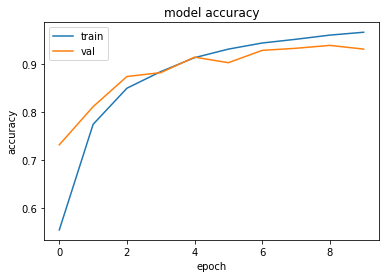

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

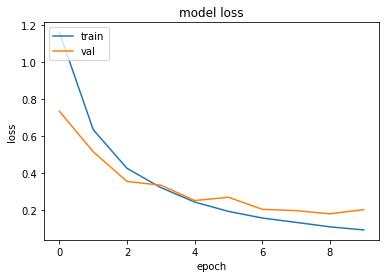

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
model.load_weights('best_model.h5')


In [31]:
classes_labels=[]
for key in classes.keys():
    classes_labels.append(key)
print(classes_labels)


[4, 6, 2, 1, 5, 0, 3]


In [32]:
y_true = np.array(y_test)
y_pred = model.predict(X_test)
#y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))
y_pred = np.argmax(y_pred , axis=1)
y_true = np.argmax(y_true , axis=1)
print(y_true[:5])
print(y_pred[:5])


[5 1 4 0 5]
[5 1 4 0 5]


In [33]:
cm=confusion_matrix(y_true,y_pred,labels=classes_labels)
print(cm)


[[1182  126   43   11    6    3    3]
 [ 139 1200   23    1    0    1    1]
 [ 106   37 1101    2    2   10    4]
 [  55   11   23 1193    7   24    5]
 [   2    2    0    0 1354    0    0]
 [  13    2    0    0    1 1343    0]
 [   0    0    0    0    0    0 1351]]


# Model Testing

In [34]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

294/294 - 1s - loss: 0.2151 - accuracy: 0.9294
